In [ ]:
# import relevant modules
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns
import sklearn
import imblearn
from sklearn.model_selection import train_test_split
# Ignore warnings
import warnings
warnings.filterwarnings('ignore')

# Settings
# pd.set_option('display.max_columns', None)
# np.set_printoptions(threshold=np.nan)
# np.set_printoptions(precision=3)

pd.set_option('display.max_columns', None)
np.set_printoptions(threshold=np.inf)  # Set threshold to sys.maxsize for untruncated representation
np.set_printoptions(precision=3)


sns.set(style="darkgrid")
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12

# LOAD DATA

In [ ]:
# train = pd.read_csv("../input/Train_data.csv")
# test = pd.read_csv("../input/Test_data.csv")


csv_file_path = 'IOT3.csv'
data = pd.read_csv(csv_file_path)

# Split the data into training and testing sets
train_data, test_data = train_test_split(data, test_size=0.2, random_state=42)

# Save the training and testing sets to new CSV files
train_data.to_csv('train.csv', index=False)
test_data.to_csv('test.csv', index=False)

In [ ]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")


print(train.head(4))

print("Training data has {} rows & {} columns".format(train.shape[0],train.shape[1]))

   flow_duration  Header_Length  Protocol Type  Duration        Rate  \
0            0.0          54.00            6.0     64.00    2.024287   
1            0.0          54.69            6.0     65.91   14.032466   
2            0.0           0.00            1.0     64.00    1.119985   
3            0.0          54.00            6.0     64.00  416.060311   

        Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0    2.024287    0.0              0.0              0.0              0.0   
1   14.032466    0.0              0.0              0.0              0.0   
2    1.119985    0.0              0.0              0.0              0.0   
3  416.060311    0.0              0.0              1.0              0.0   

   psh_flag_number  ack_flag_number  ece_flag_number  cwr_flag_number  \
0              1.0              1.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.0         

In [ ]:
print(test.head(4))

print("Testing data has {} rows & {} columns".format(test.shape[0],test.shape[1]))

   flow_duration  Header_Length  Protocol Type  Duration         Rate  \
0       0.460463      276213.00          17.00     60.00   509.252130   
1       0.136073       27317.00          17.00     64.00  4154.677564   
2       1.323409      335827.09          14.66     60.05   159.560383   
3       1.942588         108.00           6.00     64.00     1.453485   

         Srate  Drate  fin_flag_number  syn_flag_number  rst_flag_number  \
0   509.252130    0.0              0.0              0.0              0.0   
1  4154.677564    0.0              0.0              0.0              0.0   
2   159.560383    0.0              0.0              0.0              0.0   
3     1.453485    0.0              0.0              1.0              0.0   

   psh_flag_number  ack_flag_number  ece_flag_number  cwr_flag_number  \
0              0.0              0.0              0.0              0.0   
1              0.0              0.0              0.0              0.0   
2              0.0              0.

# EXPLORATORY ANALYSIS

In [ ]:
# Descriptive statistics
train.describe()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
count,8543.000000,8.543000e+03,8543.000000,8543.000000,8.543000e+03,8.543000e+03,8543.0,8543.000000,8543.000000,8543.000000,8543.000000,8543.000000,8543.0,8543.0,8543.000000,8543.000000,8543.000000,8543.00000,8543.000000,8543.000000,8543.000000,8543.000000,8543.0,8543.0,8543.000000,8543.0,8543.000000,8543.000000,8543.0,8543.0,8543.000000,8542.0,8542.0,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8542.000000,8.542000e+03,8542.000000,8542.000000,8542.000000,8.542000e+03,8542.000000,8542.000000
mean,3.631209,7.195702e+04,8.918395,66.479504,1.133990e+04,1.133990e+04,0.0,0.090015,0.213742,0.093176,0.081002,0.119747,0.0,0.0,0.094514,0.342833,0.104577,6.56779,38.816164,0.046471,0.057474,0.000351,0.0,0.0,0.000117,0.0,0.572164,0.209762,0.0,0.0,0.167623,1.0,1.0,1290.141317,88.892910,184.605046,123.738550,35.731951,124.378986,8.320710e+07,9.500294,13.077575,50.505340,3.413126e+04,0.100184,141.560860
std,46.875613,4.432040e+05,8.715501,14.571695,1.126339e+05,1.126339e+05,0.0,0.286220,0.409971,0.290696,0.272854,0.324685,0.0,0.0,0.293510,0.679765,0.311503,75.68766,323.610318,0.210515,0.232760,0.018737,0.0,0.0,0.010819,0.0,0.494794,0.407163,0.0,0.0,0.373553,0.0,0.0,2537.915971,128.352118,542.570726,238.878444,169.409719,247.004775,1.745606e+07,0.839532,8.575830,239.620963,3.650365e+05,0.241243,21.557039
min,0.000000,0.000000e+00,0.960000,39.000000,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.0,1.0,42.000000,42.000000,42.000000,42.000000,0.000000,42.000000,9.536743e-07,1.000000,9.165151,0.000000,0.000000e+00,0.000000,1.000000
25%,0.000000,5.400000e+01,6.000000,64.000000,2.091966e+00,2.091966e+00,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.000000,0.000000,0.0,0.0,0.000000,1.0,1.0,525.000000,50.000000,50.000000,50.000000,0.000000,50.000000,8.307223e+07,9.500000,10.000000,0.000000,0.000000e+00,0.000000,141.550000
50%,0.000000,5.400000e+01,6.000000,64.000000,1.615809e+01,1.615809e+01,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,1.0,1.0,567.000000,54.000000,54.000000,54.000000,0.000000,54.000000,8.312465e+07,9.500000,10.392305,0.000000,0.000000e+00,0.000000,141.550000
75%,0.113676,4.492900e+02,11.735000,64.000000,1.186446e+02,1.186446e+02,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.090000,0.000000,0.00000,0.010000,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,1.000000,0.000000,0.0,0.0,0.000000,1.0,1.0,567.480000,54.000000,55.215000,54.052083,0.357419,54.060000,8.334411e+07,9.500000,10.396749,0.496357,1.281596e+00,0.080000,141.550000
max,2935.509925,9.458469e+06,47.000000,253.090000,3.145728e+06,3.145728e+06,0.0,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,0.0,2.000000,4.770000,4.740000,3101.00000,9331.500000,1.000000,1.000000,1.000000,0.0,0.0,1.000000,0.0,1.000000,1.000000,0.0,0.0,1.000000,1.0,1.0,54554.500000,1658.800000,15994.000000,3682.322540,4414.565134,5134.000000,1.676390e+08,13.500000,84.530293,6252.410796,1.960178e+07,1.000000,244.600000


In [ ]:
# Attack Class Distribution
train['label'].value_counts()

DDoS-ICMP_Flood            1350
DDoS-UDP_Flood             1007
DDoS-TCP_Flood              787
DDoS-RSTFINFlood            770
DDoS-SYN_Flood              757
DDoS-SynonymousIP_Flood     698
DDoS-PSHACK_Flood           691
DoS-UDP_Flood               590
DoS-TCP_Flood               469
DoS-SYN_Flood               371
BenignTraffic               225
Mirai-greeth_flood          166
Mirai-udpplain              146
Mirai-greip_flood           127
DDoS-ICMP_Fragmentation      80
DDoS-UDP_Fragmentation       73
DDoS-ACK_Fragmentation       51
MITM-ArpSpoofing             48
DNS_Spoofing                 39
Recon-HostDiscovery          30
DoS-HTTP_Flood               16
Recon-OSScan                 15
VulnerabilityScan             8
Recon-PortScan                8
DDoS-HTTP_Flood               7
DDoS-SlowLoris                7
DictionaryBruteForce          4
XSS                           1
Backdoor_Malware              1
Name: label, dtype: int64

In [ ]:
train['label2'] = train['label'].apply(lambda x: 'Normal' if x == 'BenignTraffic' else 'Malicious')
test['label2'] = test['label'].apply(lambda x: 'Normal' if x == 'BenignTraffic' else 'Malicious')

In [ ]:
train['label2'].value_counts()

Malicious    8318
Normal        225
Name: label2, dtype: int64

In [ ]:
test["label2"].value_counts()

Malicious    2082
Normal         54
Name: label2, dtype: int64

In [ ]:
missing_values = train.isnull().sum()
print(missing_values)

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                1
LLC                1
Tot sum            1
Min                1
Max                1
AVG                1
Std                1
Tot size           1
IAT                1
Number             1
Magnitue           1
Radius             1
Covariance         1
Variance           1
Weight             1
label              1
label2       

In [ ]:
train = train.dropna()

# Print the DataFrame without missing values
print("DataFrame without missing values:\n", train)

DataFrame without missing values:
       flow_duration  Header_Length  Protocol Type  Duration        Rate  \
0          0.000000          54.00           6.00     64.00    2.024287   
1          0.000000          54.69           6.00     65.91   14.032466   
2          0.000000           0.00           1.00     64.00    1.119985   
3          0.000000          54.00           6.00     64.00  416.060311   
4          5.016215         114.92           6.28     67.50   45.133463   
...             ...            ...            ...       ...         ...   
8538       0.000000          54.00           6.00     64.00   11.434060   
8539       3.992767         108.00           6.00     64.00    0.500906   
8540       0.000000          54.00           6.00     64.00    7.882800   
8541       0.011073          65.57           6.22     67.68    3.851197   
8542       7.182222     3542525.16          16.55     63.31  890.208711   

           Srate  Drate  fin_flag_number  syn_flag_number  rst_f

In [ ]:
print(train.isnull().sum())

flow_duration      0
Header_Length      0
Protocol Type      0
Duration           0
Rate               0
Srate              0
Drate              0
fin_flag_number    0
syn_flag_number    0
rst_flag_number    0
psh_flag_number    0
ack_flag_number    0
ece_flag_number    0
cwr_flag_number    0
ack_count          0
syn_count          0
fin_count          0
urg_count          0
rst_count          0
HTTP               0
HTTPS              0
DNS                0
Telnet             0
SMTP               0
SSH                0
IRC                0
TCP                0
UDP                0
DHCP               0
ARP                0
ICMP               0
IPv                0
LLC                0
Tot sum            0
Min                0
Max                0
AVG                0
Std                0
Tot size           0
IAT                0
Number             0
Magnitue           0
Radius             0
Covariance         0
Variance           0
Weight             0
label              0
label2       

In [ ]:
train=train.drop(['label'], axis=1)
test=test.drop(['label'], axis=1)

# SCALING NUMERICAL ATTRIBUTES

> Indented block



In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

# extract numerical attributes and scale it to have zero mean and unit variance
cols = train.select_dtypes(include=['float64','int64']).columns
sc_train = scaler.fit_transform(train.select_dtypes(include=['float64','int64']))
sc_test = scaler.fit_transform(test.select_dtypes(include=['float64','int64']))

# turn the result back to a dataframe
sc_traindf = pd.DataFrame(sc_train, columns = cols)
sc_testdf = pd.DataFrame(sc_test, columns = cols)

# ENCODING CATEGORICAL ATTRIBUTES

In [ ]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

# extract categorical attributes from both training and test sets
cattrain = train.select_dtypes(include=['object']).copy()
cattest = test.select_dtypes(include=['object']).copy()

# encode the categorical attributes
traincat = cattrain.apply(encoder.fit_transform)
testcat = cattest.apply(encoder.fit_transform)

# separate target column from encoded data
enctrain = traincat.drop(['label2'], axis=1)
cat_Ytrain = traincat[['label2']].copy()


In [ ]:
train_x = pd.concat([sc_traindf,enctrain],axis=1)
train_y = cat_Ytrain

train_y.head()
print(train_y)
train_x.shape

train_x=train_x.dropna()
train_y=train_y.dropna()


      label2
0          0
1          0
2          0
3          0
4          0
...      ...
8538       0
8539       0
8540       0
8541       0
8542       0

[8542 rows x 1 columns]


In [ ]:
test_df = pd.concat([sc_testdf,testcat],axis=1)

# test_df_y=test['label2']
test_df = test_df.drop(['label2'], axis=1)

test_df.shape

test_df.head()

,flow_duration,Header_Length,Protocol Type,Duration,Rate,Srate,Drate,fin_flag_number,syn_flag_number,rst_flag_number,psh_flag_number,ack_flag_number,ece_flag_number,cwr_flag_number,ack_count,syn_count,fin_count,urg_count,rst_count,HTTP,HTTPS,DNS,Telnet,SMTP,SSH,IRC,TCP,UDP,DHCP,ARP,ICMP,IPv,LLC,Tot sum,Min,Max,AVG,Std,Tot size,IAT,Number,Magnitue,Radius,Covariance,Variance,Weight
0,-0.044837,0.392023,0.937947,-0.484898,-0.084689,-0.084689,0.0,-0.29123,-0.529694,-0.2978,-0.309753,-0.375534,0.0,0.0,-0.298350,-0.512340,-0.30843,-0.083559,-0.121234,-0.233011,-0.250373,0.0,0.0,0.0,0.0,0.0,-1.171893,1.952130,0.0,0.0,-0.442683,0.0,0.0,2.295567,7.963830,1.998169,4.593317,-0.204445,4.545069,-4.720830,-4.662862,4.271070,-0.204328,-0.114059,-0.406133,-4.724749
1,-0.046827,-0.111808,0.937947,-0.163889,-0.055679,-0.055679,0.0,-0.29123,-0.529694,-0.2978,-0.309753,-0.375534,0.0,0.0,-0.298350,-0.512340,-0.30843,-0.083559,-0.121234,-0.233011,-0.250373,0.0,0.0,0.0,0.0,0.0,-1.171893,1.952130,0.0,0.0,-0.442683,0.0,0.0,-0.303951,-0.291410,-0.242743,-0.302096,-0.204445,-0.298804,0.010878,0.016319,-0.355530,-0.204328,-0.114059,-0.406133,0.015379
2,-0.039541,0.512698,0.667548,-0.480885,-0.087472,-0.087472,0.0,-0.29123,-0.529694,-0.2978,-0.309753,-0.375534,0.0,0.0,-0.119892,-0.482602,-0.30843,-0.082486,-0.120695,-0.233011,-0.250373,0.0,0.0,0.0,0.0,0.0,-1.171893,-0.512261,0.0,0.0,-0.442683,0.0,0.0,2.628041,1.035677,2.211651,2.431206,2.877129,2.648705,0.026175,0.016319,2.794842,2.875913,0.880602,3.595897,0.015379
3,-0.035742,-0.166886,-0.333157,-0.163889,-0.088730,-0.088730,0.0,-0.29123,1.887883,-0.2978,-0.309753,-0.375534,0.0,0.0,-0.298350,2.461432,-0.30843,-0.083559,-0.121234,-0.233011,-0.250373,0.0,0.0,0.0,0.0,0.0,0.853320,-0.512261,0.0,0.0,-0.442683,0.0,0.0,-0.287361,-0.264823,-0.235526,-0.286330,-0.204445,-0.283204,0.025656,0.016319,-0.311080,-0.204328,-0.114059,-0.406133,0.015379
4,-0.047663,-0.166995,-0.333157,-0.010607,-0.086059,-0.086059,0.0,-0.29123,-0.529694,-0.2978,3.228383,2.662876,0.0,0.0,-0.298350,-0.497471,-0.30843,-0.072938,-0.118692,-0.233011,-0.250373,0.0,0.0,0.0,0.0,0.0,0.853320,-0.512261,0.0,0.0,-0.442683,0.0,0.0,-0.287156,-0.264823,-0.234587,-0.286172,-0.203636,-0.283048,0.023002,0.016319,-0.310641,-0.203519,-0.114058,0.141513,0.015379


# FEATURE SELECTION


### FEATURE SELECTION (SelectKBest)

In [ ]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

num_features_to_select = 10  # Adjust this based on your requirements

# SelectKBest will select the top 'num_features_to_select' features based on the scores
selector = SelectKBest(score_func=mutual_info_classif, k=num_features_to_select)


X_selected = selector.fit_transform(train_x, train_y)

# Get the indices of the selected features
selected_feature_indices = selector.get_support(indices=True)

# Print the selected features
selected_features = train_x.columns[selected_feature_indices]
print("Selected Features:", selected_features)


Selected Features: Index(['flow_duration', 'urg_count', 'rst_count', 'Max', 'Tot size', 'IAT',
       'Number', 'Magnitue', 'Variance', 'Weight'],
      dtype='object')


### FEATURE SELECTION (SelectKBest)


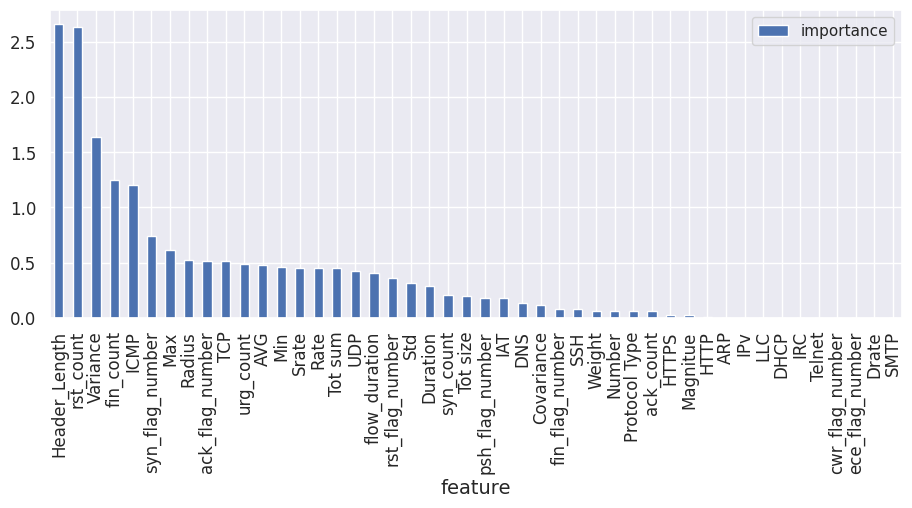

In [ ]:



from sklearn.linear_model import LogisticRegression

# Create and fit a logistic regression model
lr = LogisticRegression()
lr.fit(train_x, train_y)

# Extract coefficients and feature names
coefficients = lr.coef_[0]
feature_names = train_x.columns

# Create a DataFrame with feature importances
importances_lr = pd.DataFrame({'feature': feature_names, 'importance': np.abs(coefficients)})
importances_lr = importances_lr.sort_values('importance', ascending=False).set_index('feature')

# Plot importances for logistic regression
plt.rcParams['figure.figsize'] = (11, 4)
importances_lr.plot.bar();




In [ ]:



from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

# Example with Logistic Regression as the base estimator
lr = LogisticRegression()
rfe = RFE(lr, n_features_to_select=15)
rfe.fit(train_x, train_y)
selected_features_lr = train_x.columns[rfe.support_]

# DATASET PARTITION

In [ ]:


X_train,X_test,Y_train,Y_test = train_test_split(train_x,train_y,train_size=0.70, random_state=2)

# FITTING MODELS

In [ ]:
from sklearn.svm import SVC
from sklearn.naive_bayes import BernoulliNB
from sklearn import tree
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier


# Train LogisticRegression Model
LGR_Classifier = LogisticRegression(n_jobs=-1, random_state=0)
LGR_Classifier.fit(X_train, Y_train);

# Train Gaussian Naive Baye Model
BNB_Classifier = BernoulliNB()
BNB_Classifier.fit(X_train, Y_train)



base_estimator = DecisionTreeClassifier(max_depth=1)

# Create an AdaBoost classifier
adaboost_classifier = AdaBoostClassifier(base_estimator=base_estimator, n_estimators=50, random_state=42)
adaboost_classifier.fit(X_train, Y_train)




AdaBoostClassifier(base_estimator=DecisionTreeClassifier(max_depth=1),
                   random_state=42)

# EVALUATE MODELS


============================== Naive Baye Classifier Model Evaluation ==============================
True Positives: 149
True Negatives: 5587
False Positives: 235
False Negatives: 8
Confusion matrix:
 [[5587  235]
 [   8  149]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.96      0.98      5822
           1       0.39      0.95      0.55       157

    accuracy                           0.96      5979
   macro avg       0.69      0.95      0.76      5979
weighted avg       0.98      0.96      0.97      5979



Cross Validation Mean Score:
 0.9593617474216121

Model Accuracy:
 0.9593577521324637


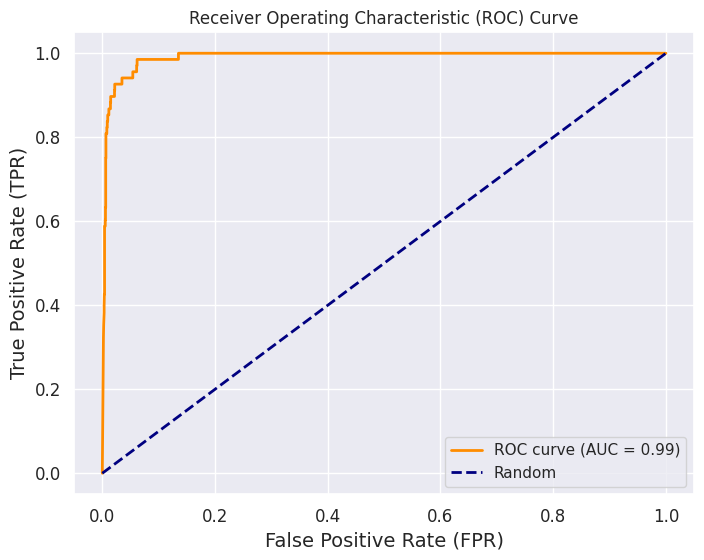


============================== LogisticRegression Model Evaluation ==============================
True Positives: 119
True Negatives: 5797
False Positives: 25
False Negatives: 38
Confusion matrix:
 [[5797   25]
 [  38  119]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      5822
           1       0.83      0.76      0.79       157

    accuracy                           0.99      5979
   macro avg       0.91      0.88      0.89      5979
weighted avg       0.99      0.99      0.99      5979



Cross Validation Mean Score:
 0.9874567934432475

Model Accuracy:
 0.9894631209232313


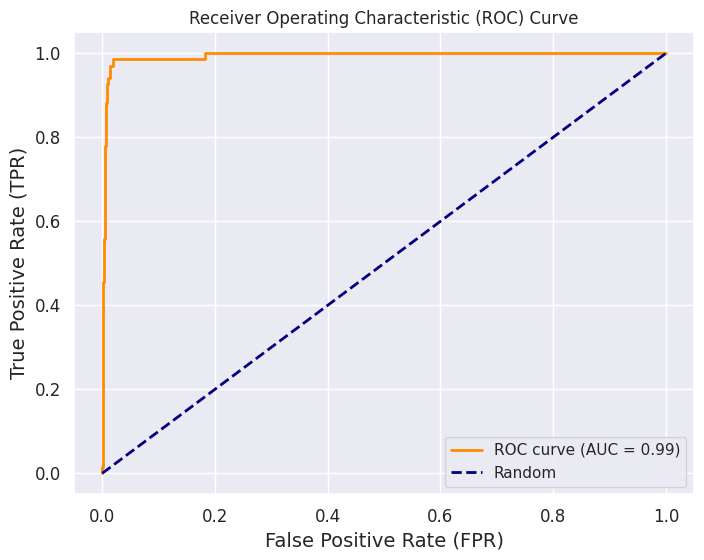


============================== AdaBoost Model Evaluation ==============================
True Positives: 157
True Negatives: 5822
False Positives: 0
False Negatives: 0
Confusion matrix:
 [[5822    0]
 [   0  157]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      5822
           1       1.00      1.00      1.00       157

    accuracy                           1.00      5979
   macro avg       1.00      1.00      1.00      5979
weighted avg       1.00      1.00      1.00      5979



Cross Validation Mean Score:
 0.9948149330823572

Model Accuracy:
 1.0


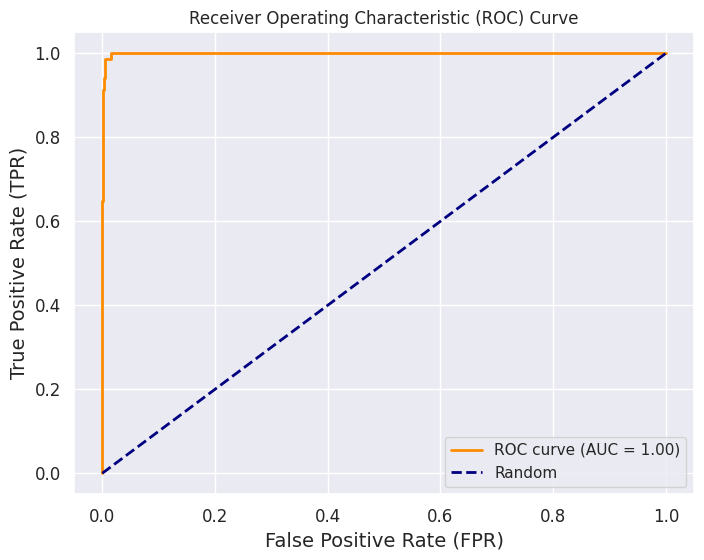

In [ ]:
from sklearn import metrics

models = []
models.append(('Naive Baye Classifier', BNB_Classifier))


models.append(('LogisticRegression', LGR_Classifier))
models.append(('AdaBoost',adaboost_classifier))

for i, v in models:
    scores = cross_val_score(v, X_train, Y_train, cv=10)
    accuracy = metrics.accuracy_score(Y_train, v.predict(X_train))
    confusion_matrix = metrics.confusion_matrix(Y_train, v.predict(X_train))
    classification = metrics.classification_report(Y_train, v.predict(X_train))
    tn, fp, fn, tp = confusion_matrix.ravel()

    print()
    print('============================== {} Model Evaluation =============================='.format(i))
    print("True Positives:", tp)
    print("True Negatives:", tn)
    print("False Positives:", fp)
    print("False Negatives:", fn)

    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()
    print()
    print ("Cross Validation Mean Score:" "\n", scores.mean())
    print()
    print ("Model Accuracy:" "\n", accuracy)

    from sklearn.metrics import roc_curve, auc
    import matplotlib.pyplot as plt
    from sklearn.ensemble import RandomForestClassifier





    Y_true = Y_test  # Corrected indentation


    Y_score = v.predict_proba(X_test)[:, 1]
    # print(Y_score)

    fpr, tpr, thresholds = roc_curve(Y_true, Y_score)
    roc_auc = auc(fpr, tpr)
      # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()



# VALIDATING MODELS


============================== Naive Baye Classifier Model Test Results ==============================
True Positives: 63
True Negatives: 2408
False Positives: 87
False Negatives: 5

Model Accuracy:
 0.9641045649629341

Confusion matrix:
 [[2408   87]
 [   5   63]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      0.97      0.98      2495
           1       0.42      0.93      0.58        68

    accuracy                           0.96      2563
   macro avg       0.71      0.95      0.78      2563
weighted avg       0.98      0.96      0.97      2563




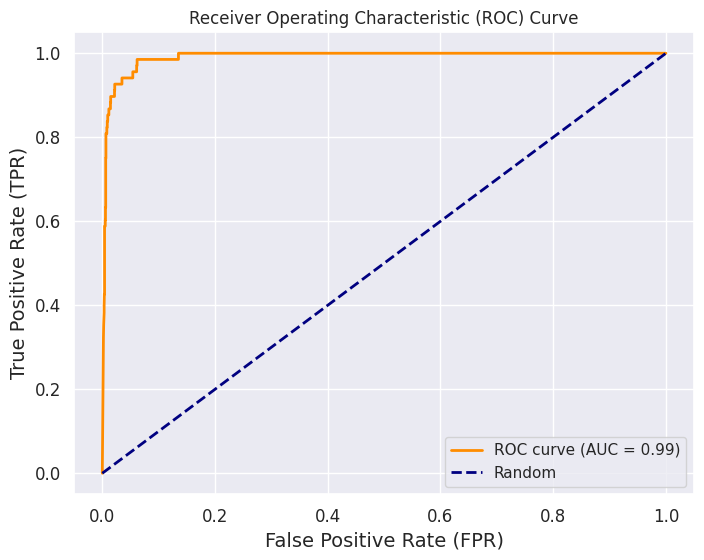


============================== LogisticRegression Model Test Results ==============================
True Positives: 45
True Negatives: 2484
False Positives: 11
False Negatives: 23

Model Accuracy:
 0.9867342957471713

Confusion matrix:
 [[2484   11]
 [  23   45]]

Classification report:
               precision    recall  f1-score   support

           0       0.99      1.00      0.99      2495
           1       0.80      0.66      0.73        68

    accuracy                           0.99      2563
   macro avg       0.90      0.83      0.86      2563
weighted avg       0.99      0.99      0.99      2563




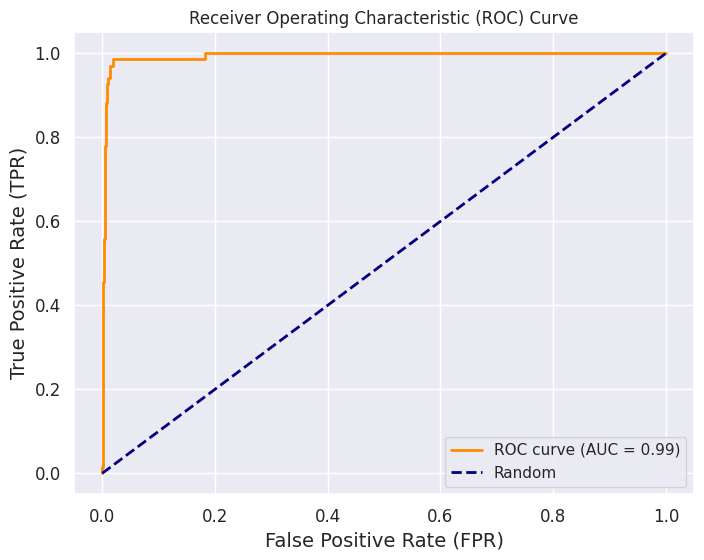


============================== AdaBoost Model Test Results ==============================
True Positives: 57
True Negatives: 2491
False Positives: 4
False Negatives: 11

Model Accuracy:
 0.9941474834178697

Confusion matrix:
 [[2491    4]
 [  11   57]]

Classification report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00      2495
           1       0.93      0.84      0.88        68

    accuracy                           0.99      2563
   macro avg       0.97      0.92      0.94      2563
weighted avg       0.99      0.99      0.99      2563




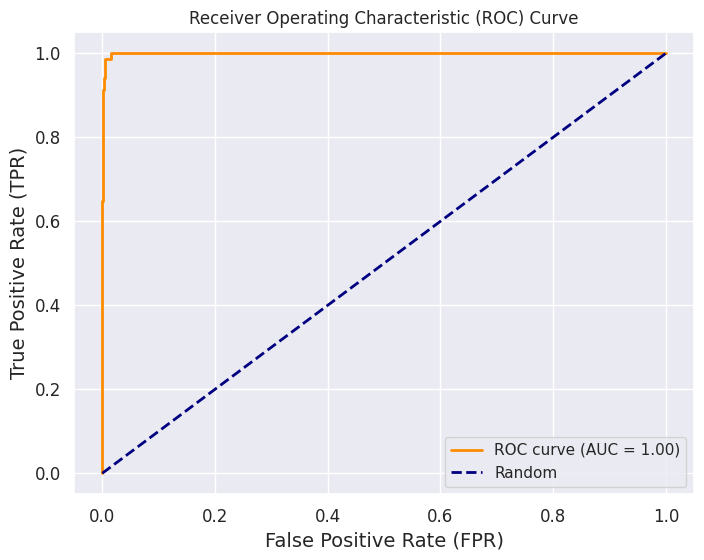

In [ ]:
for i, v in models:
    accuracy = metrics.accuracy_score(Y_test, v.predict(X_test))
    confusion_matrix = metrics.confusion_matrix(Y_test, v.predict(X_test))
    classification = metrics.classification_report(Y_test, v.predict(X_test))
    tn, fp, fn, tp = confusion_matrix.ravel()

    print()
    print('============================== {} Model Test Results =============================='.format(i))
    print("True Positives:", tp)
    print("True Negatives:", tn)
    print("False Positives:", fp)
    print("False Negatives:", fn)

    print()
    print ("Model Accuracy:" "\n", accuracy)
    print()
    print("Confusion matrix:" "\n", confusion_matrix)
    print()
    print("Classification report:" "\n", classification)
    print()

    Y_true = Y_test  # Corrected indentation


    Y_score = v.predict_proba(X_test)[:, 1]
    # print(Y_score)

    fpr, tpr, thresholds = roc_curve(Y_true, Y_score)
    roc_auc = auc(fpr, tpr)
      # Plot ROC curve
    plt.figure(figsize=(8, 6))
    plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Random')
    plt.xlabel('False Positive Rate (FPR)')
    plt.ylabel('True Positive Rate (TPR)')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend(loc='lower right')
    plt.show()


In [ ]:
# PREDICTING FOR TEST DATA using KNN

pred_NB = BNB_Classifier.predict(test_df)
pred_log = LGR_Classifier.predict(test_df)
pred_ada = adaboost_classifier.predict(test_df)